In [1]:
import pandas as pd
from read import *

In [5]:
f  = "../osm/CB_002/run/eplusout.sql"
cb = read_eplusql(f,read="data",rename=True) 

In [8]:
cb.vars_numbered

[(0, 'Id'),
 (1, 'Ib'),
 (2, 'To'),
 (3, 'rh'),
 (4, 'ws'),
 (5, 'PAESTE:Zone Air Relative Humidity (%)'),
 (6, 'PAESTE:Zone Air Temperature (C)'),
 (7, 'Ti_PAESTE'),
 (8, 'PAOESTE:Zone Air Relative Humidity (%)'),
 (9, 'PAOESTE:Zone Air Temperature (C)'),
 (10, 'Ti_PAOESTE'),
 (11, 'PBESTE:Zone Air Relative Humidity (%)'),
 (12, 'PBESTE:Zone Air Temperature (C)'),
 (13, 'Ti_PBESTE'),
 (14, 'PBOESTE:Zone Air Relative Humidity (%)'),
 (15, 'PBOESTE:Zone Air Temperature (C)'),
 (16, 'Ti_PBOESTE')]

In [7]:
cb.rename_cols([0,1,3,4],["Id","Ib","rh","ws"])

In [11]:
cb.vars

Index(['Id', 'Ib', 'To', 'rh', 'ws', 'PAESTE:Zone Air Relative Humidity (%)',
       'PAESTE:Zone Air Temperature (C)', 'Ti_PAESTE',
       'PAOESTE:Zone Air Relative Humidity (%)',
       'PAOESTE:Zone Air Temperature (C)', 'Ti_PAOESTE',
       'PBESTE:Zone Air Relative Humidity (%)',
       'PBESTE:Zone Air Temperature (C)', 'Ti_PBESTE',
       'PBOESTE:Zone Air Relative Humidity (%)',
       'PBOESTE:Zone Air Temperature (C)', 'Ti_PBOESTE'],
      dtype='object', name='variable_name')

<AxesSubplot:xlabel='date'>

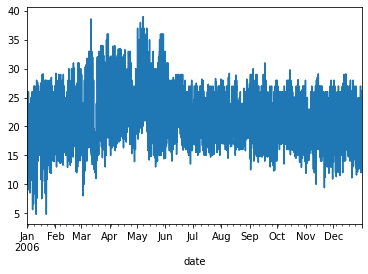

In [10]:
data_cb = cb.get_data()

In [16]:
variables = ['Id', 'Ib', 'To', 'rh', 'ws', 'Ti_PAESTE','Ti_PAOESTE','Ti_PBESTE', 'Ti_PBOESTE']
data = cb.get_data(variables)

In [17]:
data

variable_name,Id,Ib,To,rh,ws,Ti_PAESTE,Ti_PAOESTE,Ti_PBESTE,Ti_PBOESTE
date,,,,,,,,,
2006-01-01 00:00:00,0.0,0.0,12.000000,64.0,2.800000,26.380221,26.602088,26.295821,26.710547
2006-01-01 00:10:00,0.0,0.0,11.866667,64.5,2.450000,26.247845,26.471276,26.163906,26.580890
2006-01-01 00:20:00,0.0,0.0,11.733333,65.0,2.100000,26.247692,26.473747,26.165505,26.585509
2006-01-01 00:30:00,0.0,0.0,11.600000,65.5,1.750000,26.246453,26.475040,26.166354,26.588974
2006-01-01 00:40:00,0.0,0.0,11.466667,66.0,1.400000,26.244147,26.475221,26.166489,26.591381
...,...,...,...,...,...,...,...,...,...
2006-12-31 23:10:00,0.0,0.0,18.000000,56.5,1.416667,25.708500,25.983413,25.715870,26.245108
2006-12-31 23:20:00,0.0,0.0,17.900000,57.0,1.433333,25.722355,26.003926,25.727475,26.266511
2006-12-31 23:30:00,0.0,0.0,17.800000,57.5,1.450000,25.735170,26.023082,25.738530,26.286647


<AxesSubplot:xlabel='date'>

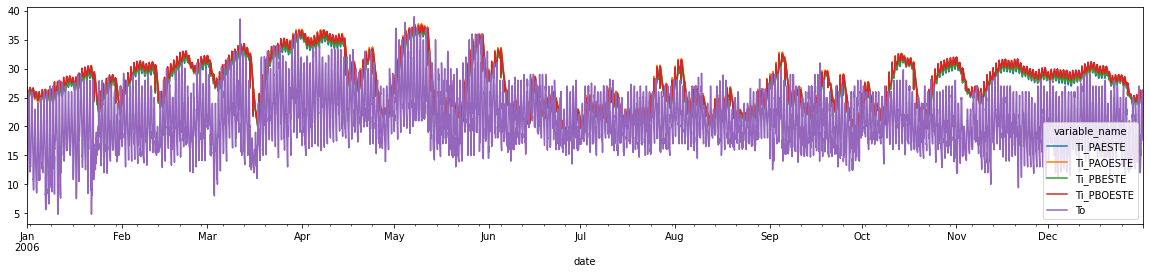

In [19]:
zonas = ['Ti_PAESTE','Ti_PAOESTE','Ti_PBESTE', 'Ti_PBOESTE',"To"]
data[zonas].plot(figsize=(20,4))

<AxesSubplot:xlabel='date'>

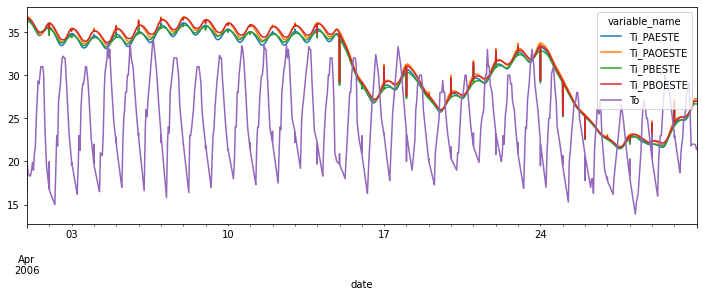

In [21]:
zonas = ['Ti_PAESTE','Ti_PAOESTE','Ti_PBESTE', 'Ti_PBOESTE',"To"]
data.loc["2006-04"][zonas].plot(figsize=(12,4))

# Vamos a revisar el clima

<AxesSubplot:xlabel='date,date,date'>

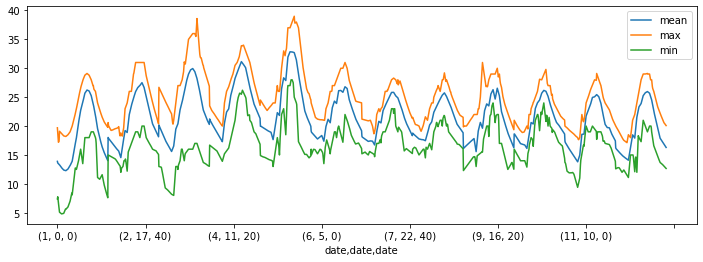

In [23]:
variable = "To"
data[variable].groupby(by=[data.index.month,data.index.hour,data.index.minute]).agg(["mean","max","min"]).plot(figsize=(12,4))

<AxesSubplot:xlabel='date,date,date'>

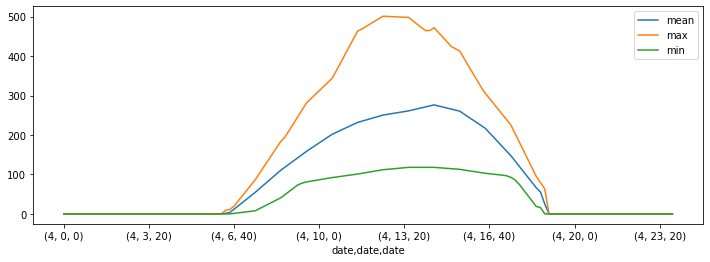

In [25]:
variable = "Id"
mes = "2006-04"
data_mes = data.loc[mes]
data_mes[variable].groupby(by=[data_mes.index.month,data_mes.index.hour,data_mes.index.minute]).agg(["mean","max","min"]).plot(figsize=(12,4))

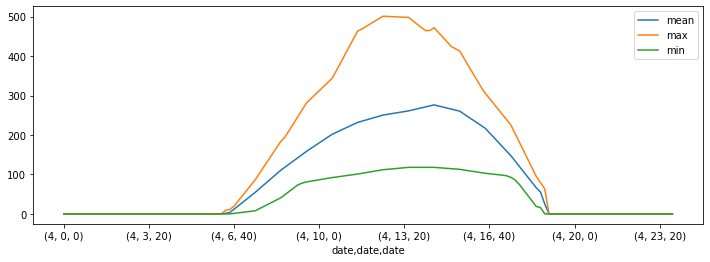

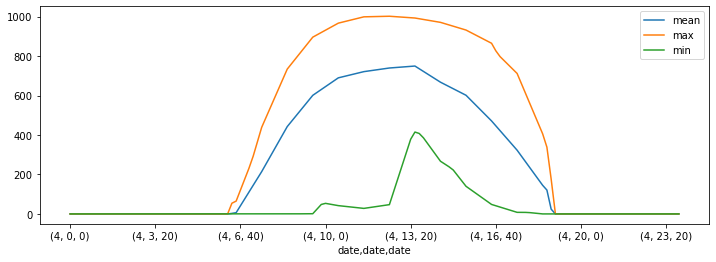

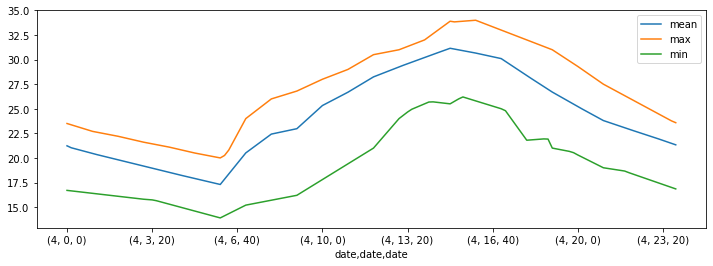

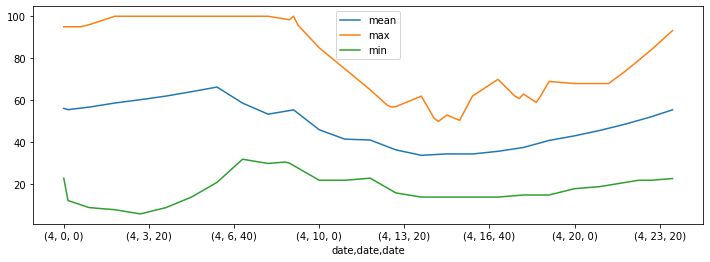

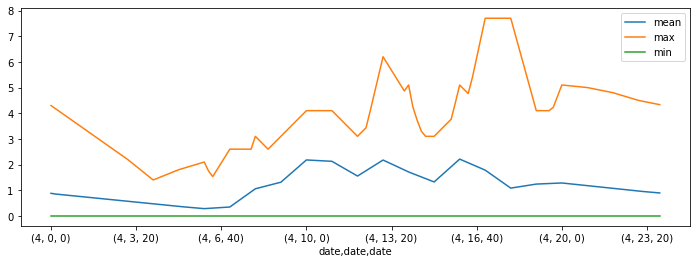

In [26]:
vars = variables = ['Id', 'Ib', 'To', 'rh', 'ws']

for variable in vars:
    mes = "2006-04"
    data_mes = data.loc[mes]
    data_mes[variable].groupby(by=[data_mes.index.month,data_mes.index.hour,data_mes.index.minute]).agg(["mean","max","min"]).plot(figsize=(12,4))